In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

SEED = 0

%matplotlib inline

## What are the Go Environments?

In [2]:
for i in gym.envs.registry.all():
    if 'Go' in i.id:
        print(i.id)

GopherDeterministic-v0
Gopher-ram-v4
Go19x19-v0
Gopher-ramNoFrameskip-v4
GopherNoFrameskip-v4
GopherDeterministic-v4
Gopher-ramDeterministic-v0
Gopher-ramDeterministic-v4
Gopher-v4
Gopher-ram-v0
GopherNoFrameskip-v0
Gopher-ramNoFrameskip-v0
Gopher-v0
Go9x9-v0


In [3]:
env_id = 'Go9x9-v0'

In [4]:
env = gym.make(env_id)

In [5]:
obs = env.reset()
obs, reward, done, info = env.step(0)

## Actions

In [6]:
print('ACTION shape: {}'.format(env.action_space.shape))
print('Number of ACTIONS: {}'.format(env.action_space.n))
# 9x9 + 1 + 1 = 83, 81 moves + pass + resign

print('Is [83] an ACTION?: {}'.format(env.action_space.contains(83)))
print('ACTION range from 0 to 82.')

ACTION shape: ()
Number of ACTIONS: 83
Is [83] an ACTION?: False
ACTION range from 0 to 82.


## Observation

In [7]:
print('OBSERVATION type: {}'.format(env.observation_type))
print('OBSERVATION shape: {}'.format(env.observation_space.shape))
# looks like 3 channels with height by width

OBSERVATION type: image3c
OBSERVATION shape: (3, 9, 9)


## Making the Environment

[Github Souec Code](https://github.com/openai/gym/blob/master/gym/envs/board_game/go.py)

``` python 
class GoEnv(gym.Env):
    '''
    Go environment. Play against a fixed opponent.
    '''
    metadata = {"render.modes": ["human", "ansi"]}

    def __init__(self, player_color, opponent, observation_type, illegal_move_mode, board_size):
        """
        Args:
            player_color: Stone color for the agent. Either 'black' or 'white'
            opponent: An opponent policy
            observation_type: State encoding
            illegal_move_mode: What to do when the agent makes an illegal move. Choices: 'raise' or 'lose'
        """

```

## Environment Details

In [8]:
def reset(env):
    ob = env.reset()
    env.seed(SEED)
    return env, ob

In [9]:
env, ob = reset(env)

# play the game for 10 steps
actions = []
for i in range(10):
    a = env.action_space.sample()
    actions.append(a)
    ob, r, done, info = env.step(a)
    if done:
        break

print('ACTIONS: {}'.format(actions))

ACTIONS: [44, 47, 64, 67, 67]


In [10]:
black = env.state.board.black_stones
print('Black Stones: ', end='')
for c in black:
    print(c, end='')
print('')
print('Black Board')
print(ob[0])

Black Stones: [4 8][5 2][7 1][7 4]
Black Board
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


To play: black
Move:   8  Komi: 0.0  Handicap: 0  Captures B: 0 W: 0
      A B C D E F G H J  
    +-------------------+
  9 | . . . . . . . . . |
  8 | . . . . . . . . . |
  7 | . . O). . . . . . |
  6 | . . . . . . . O . |
  5 | . . . . . . . O X |
  4 | . . X . . . . O . |
  3 | . . . . . . . . . |
  2 | . X . . X . . . . |
  1 | . . . . . . . . . |
    +-------------------+


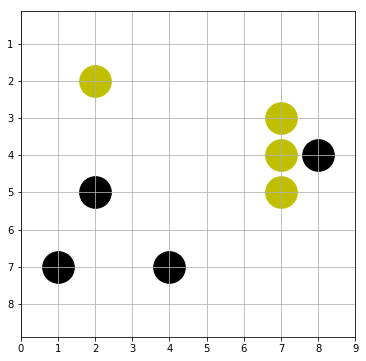

In [11]:
def see_board(env):
    white = env.state.board.white_stones
    black = env.state.board.black_stones
    
    fig = plt.figure(figsize=(6, 6))
    wy, wx = zip(*white)
    by, bx = zip(*black)
    plt.scatter(wx, wy, c='y', marker='o', s=1000)
    plt.scatter(bx, by, c='k', marker='o', s=1000)
    plt.grid()
    plt.axis('equal')
    lim = plt.axis([0, 9, 0, 9])
    plt.gca().invert_yaxis()

env.render()
see_board(env)

In [12]:
type(env.state.board)
# Looks like gym uses pachi_py
# Could be interesting to investigate, maybe for another time

pachi_py.cypachi.PyPachiBoard